In [59]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.metrics import accuracy_score

In [9]:
train_data = pd.read_csv('sign_mnist_train.csv')

In [46]:
test_data = pd.read_csv('sign_mnist_test.csv')

In [10]:
train_data.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149


In [11]:
x = train_data.iloc[:,1:].values
print("Number of images: ", x.shape[0])

Number of images:  27455


In [13]:
labels = train_data['label']
train_data.drop('label', axis = 1, inplace = True)

In [14]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [26]:
Training_image1 = train_data.values
Training_image1.shape

(27455, 784)

In [25]:
Training_images = train_data.values
Training_images = np.array([np.reshape(i, (28,28)) for i in Training_images])
images = np.array([i.flatten() for i in Training_images])
images.shape

(27455, 784)

In [27]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 101)

In [31]:
batch_size = 128
num_classes = 24
epochs = 50

In [32]:
x_train = x_train / 255
x_test = x_test / 255

In [33]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [34]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

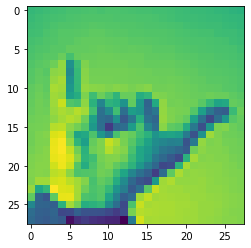

In [35]:
plt.imshow(x_train[1].reshape(28,28))

In [36]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

W0816 22:07:57.198247   904 deprecation_wrapper.py:119] From D:\MiniConda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0816 22:07:58.060973   904 deprecation_wrapper.py:119] From D:\MiniConda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0816 22:07:58.160964   904 deprecation_wrapper.py:119] From D:\MiniConda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0816 22:07:58.319930   904 deprecation_wrapper.py:119] From D:\MiniConda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0816 22:07:58.387872   904 deprecation_wrapper.py:119] From D:

In [37]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

W0816 22:08:22.944378   904 deprecation_wrapper.py:119] From D:\MiniConda\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0816 22:08:22.950377   904 deprecation_wrapper.py:119] From D:\MiniConda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [38]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

W0816 22:08:37.793258   904 deprecation.py:323] From D:\MiniConda\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 34s 2ms/step - loss: 2.5630 - acc: 0.2069 - val_loss: 1.6390 - val_acc: 0.4657
Epoch 2/50
21964/21964 [==============================] - 33s 2ms/step - loss: 1.2496 - acc: 0.5767 - val_loss: 0.7322 - val_acc: 0.7704
Epoch 3/50
21964/21964 [==============================] - 33s 2ms/step - loss: 0.6895 - acc: 0.7621 - val_loss: 0.4063 - val_acc: 0.8787
Epoch 4/50
21964/21964 [==============================] - 35s 2ms/step - loss: 0.4283 - acc: 0.8539 - val_loss: 0.2635 - val_acc: 0.9241
Epoch 5/50
21964/21964 [==============================] - 37s 2ms/step - loss: 0.2809 - acc: 0.9071 - val_loss: 0.1592 - val_acc: 0.9567
Epoch 6/50
21964/21964 [==============================] - 37s 2ms/step - loss: 0.1830 - acc: 0.9410 - val_loss: 0.1228 - val_acc: 0.9614
Epoch 7/50
21964/21964 [==============================] - 36s 2ms/step - loss: 0.1341 - acc: 0.9569 - val_loss: 0.0530 - val_acc:

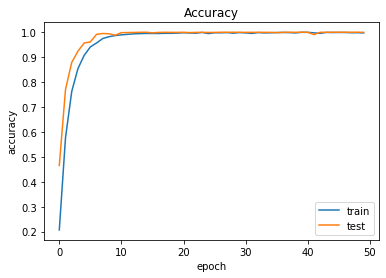

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [43]:
#history.history.keys()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()


In [49]:
test_labels = test_data['label']

In [52]:
test_data.drop('label', axis = 1, inplace = True)

In [57]:
test_images = test_data.values
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape

(7172, 28, 28, 1)

In [61]:
test_images = test_data.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [62]:
test_labels = label_binrizer.fit_transform(test_labels)

In [63]:
y_pred = model.predict(test_images)

In [64]:
accuracy_score(test_labels, y_pred.round())

0.8070273284997211